Die Ladung von 7 ist kleiner als  die Schwelle ein 54.4: Haus einschalten, valve auf


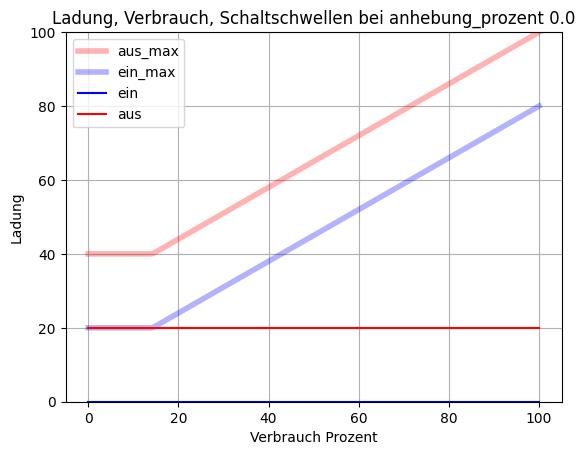

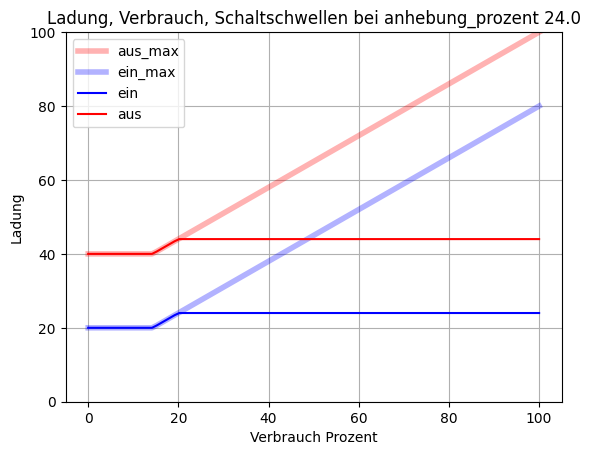

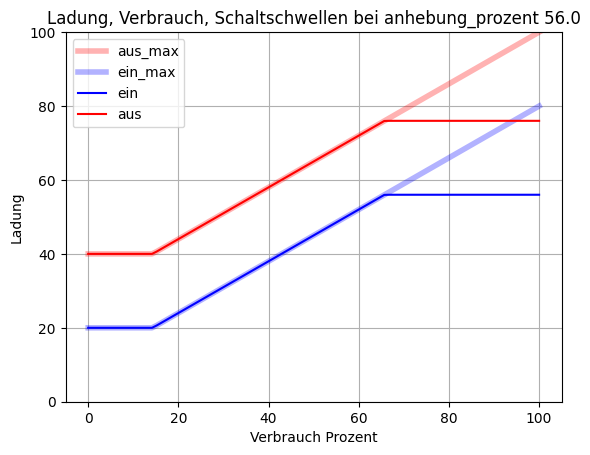

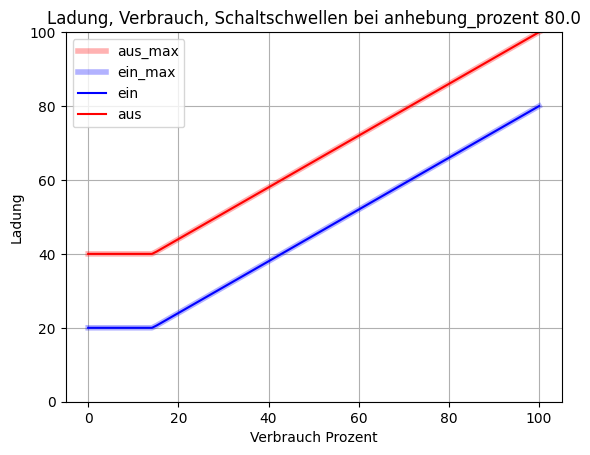

In [1]:
'''
Ueberlegungen:
Ich möchte die dezentralen Speichern nicht hoch laden weil das Verluste gibt.
So lange die zentrale keine überschüssige Wärme hat, so werden die dezentralen speicher nur wenig geladen.

Bei ueberschüssiger Wärme lade ich die dezentralen Speicher höher. 
Vermeiden von Brennzyklen und verlängern der Ausschaltzeit rechtfertigen die grösseren Verluste.
Wenn alle Häuser fertig und maximal geladen sind, so schalten die Brenner aus.

Bei zu viel Wärme wird die "anhebung" erhöht, bei zu wenig Wärme wird sie reduziert.

'''



import numpy as np
import matplotlib.pyplot as plt

class Ladung_verbrauch:
    def __init__(self):
        self.verbrauch_prozent = None
        self.ladung_prozent = None
        self.hysterese = 20
        self.anhebung_prozent = None
        self.aus_max_rechts = 100
        assert self.aus_max_rechts == 100

    def set_verbrauch_prozent(self, verbrauch_prozent):
        '''Das Haus mit 100% hat den maximalen Verbrauch. Die anderen sind entsprechend skaliert.'''
        self.verbrauch_prozent = max(min(verbrauch_prozent, 100.0), 0.0)

    def set_ladung_prozent(self, ladung_prozent):
        '''Ladung kleiner 0% bedeutet zu wenig Waerme.'''
        self.ladung_prozent = ladung_prozent
        assert -200.0 < self.ladung_prozent < 300.0


    def set_anhebung_prozent(self, anhebung_prozent):
        '''Die Schwellen hoeher setzen, 0 bis 100'''
        self.anhebung_prozent = max(min(anhebung_prozent, 100.0), 0.0)
        '''skalieren auf den verfuegbaren Bereich'''
        self.anhebung_prozent = self.anhebung_prozent * (self.aus_max_rechts - self.hysterese) / 100.0
        assert 0.0 <=self.anhebung_prozent <= 100.0

    def do_mehr_haeuser(self):
        self.anhebung_prozent = min(100.0, self.anhebung_prozent + 1.0)

    def do_weniger_haeuser(self):
        self.anhebung_prozent = max(0.0, self.anhebung_prozent - 1.0)

    def hausinfo(self):
        if self.ladung_prozent > self.aus:
            print(f'Die Ladung von {self.ladung_prozent} ist groesser als die Schwelle aus {self.aus}: Haus ausschalten, valve zu')
            return
        if self.ladung_prozent < self.ein:
            print(f'Die Ladung von {self.ladung_prozent} ist kleiner als  die Schwelle ein {self.ein}: Haus einschalten, valve auf')
            return
        print(f'Hausinfo: Haus keine Aenderung noetig')

    @property
    def aus_max(self):
        aus_max_links = 30
        aus_max_min = 40
        steigung = (self.aus_max_rechts - aus_max_links)/100.0
        aus = self.verbrauch_prozent *  steigung + aus_max_links
        aus = max(aus, aus_max_min)
        return aus
    
    @property
    def ein_max(self):
        return self.aus_max - self.hysterese
    
    @property
    def aus(self):
        aus = 0 + self.hysterese+ self.anhebung_prozent
        aus = min(aus, self.aus_max)
        return aus
    
    @property
    def ein(self):
        ein = 0 + self.anhebung_prozent
        ein = min(ein, self.ein_max)
        return ein


funktion = Ladung_verbrauch()
funktion.set_verbrauch_prozent(verbrauch_prozent = 80)
funktion.set_ladung_prozent(ladung_prozent = 7)
funktion.set_anhebung_prozent(anhebung_prozent = 68)


funktion.hausinfo()



def plotBild():
    verbrauch_prozent_values = np.linspace(0, 100, 100)
    aus_max_values = []
    ein_max_values = []
    ein_values = []
    aus_values = []
    for verbrauch_prozent in verbrauch_prozent_values:
        funktion.set_verbrauch_prozent(verbrauch_prozent)
        aus_max_values.append(funktion.aus_max)
        ein_max_values.append(funktion.ein_max)
        ein_values.append(funktion.ein)
        aus_values.append(funktion.aus)

    plt.plot(verbrauch_prozent_values, aus_max_values, label='aus_max', color='red', alpha=0.3, linewidth=4)
    plt.plot(verbrauch_prozent_values, ein_max_values, label='ein_max', color='blue', alpha=0.3, linewidth=4)
    plt.plot(verbrauch_prozent_values, ein_values, label='ein', color='blue')
    plt.plot(verbrauch_prozent_values, aus_values, label='aus', color='red')
    plt.title(f'Ladung, Verbrauch, Schaltschwellen bei anhebung_prozent {funktion.anhebung_prozent}')
    plt.xlabel('Verbrauch Prozent')
    plt.ylabel('Ladung')
    plt.grid(True)
    plt.legend()
    plt.ylim(0, 100)
    plt.show()

for anhebung_prozent in [0, 30, 70, 100]:
    funktion.set_anhebung_prozent(anhebung_prozent = anhebung_prozent)
    plotBild()